In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib notebook
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
courses=pd.read_csv("courses.csv")
assessments=pd.read_csv("assessments.csv")
moodle=pd.read_csv("moodle.csv")
studentAssessment=pd.read_csv("studentAssessment.csv")
studentInfo=pd.read_csv("studentInfo.csv")
studentMoodleInteract=pd.read_csv("studentMoodleInteract.csv")
studentRegistration=pd.read_csv("studentRegistration.csv")

In [3]:
courses.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [4]:
courses.duplicated().sum()

0

In [5]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [6]:
oct=courses[courses["code_presentation"].str.contains("J")]
oct.count()[0]

13

In [7]:
feb=courses[courses["code_presentation"].str.contains("B")]
feb.shape[0]

9

In [8]:
print("there are ",oct.count()[0]-feb.shape[0], "more presentation in october")

there are  4 more presentation in october


In [9]:
oct["module_presentation_length"].sum()

3463

In [10]:
feb["module_presentation_length"].sum()

2159

In [11]:
print("october has ",oct["module_presentation_length"].sum()-feb["module_presentation_length"].sum(), "more module presentation length")

october has  1304 more module presentation length


In [12]:
crossed_oct=pd.crosstab(oct["code_module"],oct["code_presentation"])
crossed_oct["same_semester"]=crossed_oct["2013J"] & crossed_oct["2014J"]
find_sameLength=pd.crosstab(oct["code_module"],oct["module_presentation_length"])
find_sameLength["same_modulePresentationLength"]=find_sameLength[find_sameLength==2].sum(axis=1)
crossed_oct["same_modulePresentationLength"]=find_sameLength["same_modulePresentationLength"]
crossed_oct

code_presentation,2013J,2014J,same_semester,same_modulePresentationLength
code_module,,,,
AAA,1,1,1,0.0
BBB,1,1,1,0.0
CCC,0,1,0,0.0
DDD,1,1,1,0.0
EEE,1,1,1,0.0
FFF,1,1,1,0.0
GGG,1,1,1,0.0


In [13]:
crossed_feb=pd.crosstab(feb["code_module"],feb["code_presentation"])
crossed_feb["same_semester"]=crossed_feb["2013B"] & crossed_feb["2014B"]
find_sameLengthFeb=pd.crosstab(feb["code_module"],feb["module_presentation_length"])
find_sameLengthFeb["same_modulePresentationLength"]=find_sameLengthFeb[find_sameLengthFeb==2].sum(axis=1)
crossed_feb["same_modulePresentationLength"]=find_sameLengthFeb["same_modulePresentationLength"]
crossed_feb

code_presentation,2013B,2014B,same_semester,same_modulePresentationLength
code_module,,,,
BBB,1,1,1,0.0
CCC,0,1,0,0.0
DDD,1,1,1,0.0
EEE,0,1,0,0.0
FFF,1,1,1,0.0
GGG,0,1,0,0.0


In [14]:
crossed_courses=pd.crosstab(courses["code_module"],courses["code_presentation"])
crossed_courses["both_2013BandJ"]=crossed_courses["2013B"]&crossed_courses["2013J"]
crossed_courses["both_2014BandJ"]=crossed_courses["2014B"]&crossed_courses["2014J"]
find_sameYearLength=pd.crosstab(courses["code_module"],courses["module_presentation_length"])
find_sameYearLength["sameLength"]=find_sameYearLength[find_sameYearLength==2].sum(axis=1)
crossed_courses["sameLength"]=find_sameYearLength["sameLength"]
crossed_courses
# there is no same length even with all parameters

code_presentation,2013B,2013J,2014B,2014J,both_2013BandJ,both_2014BandJ,sameLength
code_module,,,,,,,
AAA,0,1,0,1,0,0,0.0
BBB,1,1,1,1,1,1,0.0
CCC,0,0,1,1,0,1,0.0
DDD,1,1,1,1,1,1,0.0
EEE,0,1,1,1,0,1,0.0
FFF,1,1,1,1,1,1,0.0
GGG,0,1,1,1,0,1,0.0


In [15]:
# 1.2. Student Info Table
studentInfo.shape

(32593, 12)

In [16]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [17]:
studentInfo.loc[:,["id_student","code_module","code_presentation"]].duplicated().sum()
# those parameters are not dublicated so we do not have such problem.

0

[<matplotlib.lines.Line2D object at 0x00000176800F2FA0>, <matplotlib.lines.Line2D object at 0x0000017680105040>, <matplotlib.lines.Line2D object at 0x0000017680105100>, <matplotlib.lines.Line2D object at 0x00000176801051C0>, <matplotlib.lines.Line2D object at 0x0000017680105280>, <matplotlib.lines.Line2D object at 0x0000017680105340>, <matplotlib.lines.Line2D object at 0x0000017680105400>, <matplotlib.lines.Line2D object at 0x00000176801054C0>, <matplotlib.lines.Line2D object at 0x0000017680105580>, <matplotlib.lines.Line2D object at 0x0000017680105640>, <matplotlib.lines.Line2D object at 0x00000176800C7F10>, <matplotlib.lines.Line2D object at 0x0000017680105790>, <matplotlib.lines.Line2D object at 0x0000017680105850>]


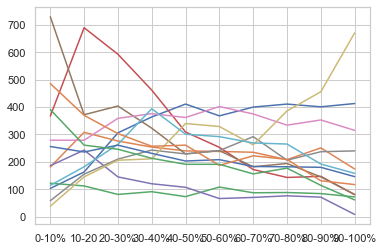

In [18]:
# there are 32593 data
# just the imd_band parameter has 1111 missing values so its not high enough to ignore

print(plt.plot(pd.crosstab(studentInfo["imd_band"],studentInfo["region"])))

# seems like no correlation between region and imd_band (or I do not know much about it)
# so I will drop missing values permenantly

In [19]:
# I will keep this for future
missing_indexes=studentInfo[studentInfo["imd_band"].isnull()].index

In [20]:
studentInfo.dropna(inplace=True)
studentInfo.shape

(31482, 12)

In [21]:
studentInfo["num_of_prev_attempts"].value_counts()
# it is obvious that there is a negative correlation between attempt number and amount of students.

0    27431
1     3196
2      659
3      140
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

In [22]:
pd.crosstab(studentInfo["age_band"],studentInfo["highest_education"])
# due to it is so less people are in 55<= group, I will merge it to the 35-55 group

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
age_band,,,,,
0-35,10432,2471,9052,275,42
35-55,3290,1851,3677,53,138
55<=,40,122,33,0,6


In [23]:
studentInfo["age_band"] = studentInfo["age_band"].replace(["35-55","55<="],"35<=")
studentInfo["age_band"].value_counts()

0-35    22272
35<=     9210
Name: age_band, dtype: int64

In [24]:
imd_highest=pd.crosstab(studentInfo["imd_band"],studentInfo["highest_education"])
imd_highest
# no formal quals is not so much. I will add it to the Lower than A
# also, Post Graduate is not high enough. it goes to HE or more with HE Qualification

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
imd_band,,,,,
0-10%,1292,349,1597,73,0
10-20,1460,360,1625,59,12
20-30%,1456,505,1589,84,20
30-40%,1573,474,1430,56,6
40-50%,1490,455,1299,7,5
50-60%,1406,422,1262,18,16
60-70%,1344,420,1100,20,21
70-80%,1315,467,1087,5,5
80-90%,1247,498,991,0,26


In [25]:
studentInfo["highest_education"] = studentInfo["highest_education"].replace(["No Formal quals"],"Lower Than A Level")
studentInfo["highest_education"] = studentInfo["highest_education"].replace(["Post Graduate Qualification"],"HE or more")
studentInfo["highest_education"] = studentInfo["highest_education"].replace(["HE Qualification"],"HE or more")
studentInfo["highest_education"].value_counts()
# fair enough

A Level or Equivalent    13762
Lower Than A Level       13090
HE or more                4630
Name: highest_education, dtype: int64

final_result  Distinction  Fail   Pass  Withdrawn
disability                                       
N                    2608  6198  10860       8685
Y                     217   709    970       1235
disability
N    0.620891
Y    0.448866
dtype: float64


<BarContainer object of 2 artists>

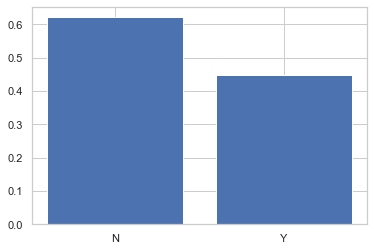

In [26]:
# lets see the importance of disability info.

disabilityVsFinals=pd.crosstab(studentInfo["disability"],studentInfo["final_result"])
print(disabilityVsFinals)
# looks like not related. lets find pass/fail and see on a graph.

div_disVsfin=disabilityVsFinals["Pass"]/(disabilityVsFinals.loc[:,["Distinction","Fail","Withdrawn"]].sum(axis=1))
print(div_disVsfin)
plt.bar(div_disVsfin.index,div_disVsfin.values)

In [27]:
# well, it is almost 1.5 times more possible to fail if you are disabled.
# However, due to size and meaning of the withdrawn and distinction data,
#  it is not a good idea to combine them or add to fail.

final_result  Distinction  Fail  Pass  Withdrawn
imd_band                                        
avg                  1204  2720  5005       3895
bad                   622  2672  3389       3798
good                  999  1515  3436       2227


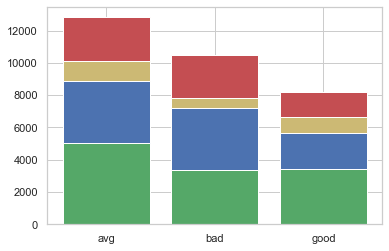

In [28]:
# imd_band has almost same amount in every 2 parameter
# it could be a good practice to combine them. ease the visualization and
# decrease unnecessary data crowd

studentInfo["imd_band"]=studentInfo["imd_band"].replace(["0-10%","10-20","20-30%"],"bad")
studentInfo["imd_band"]=studentInfo["imd_band"].replace(["30-40%","40-50%","50-60%","60-70%"],"avg")
studentInfo["imd_band"]=studentInfo["imd_band"].replace(["80-90%","90-100%","70-80%"],"good")

imdVsFinal=pd.crosstab(studentInfo["imd_band"],studentInfo["final_result"])
print(imdVsFinal)
# better

# lets make a bar chart
plt.bar(imdVsFinal.index, imdVsFinal["Pass"], color='g')
plt.bar(imdVsFinal.index, imdVsFinal["Withdrawn"], bottom=imdVsFinal["Pass"], color='b')
plt.bar(imdVsFinal.index, imdVsFinal["Distinction"], bottom=imdVsFinal["Pass"]+imdVsFinal["Withdrawn"], color='y')
plt.bar(imdVsFinal.index, imdVsFinal["Fail"], bottom=imdVsFinal["Pass"]+imdVsFinal["Withdrawn"]+imdVsFinal["Distinction"], color='r')
plt.show()
# terrible color choices

In [29]:
# 1.3. Registration Table

In [30]:
studentRegistration.drop(missing_indexes,inplace=True)
# dropped to a proper merge

In [31]:
studentRegistration.shape
# same with studentInfo

(31482, 5)

In [32]:
studentRegistration=studentRegistration.join(studentInfo["final_result"])
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,AAA,2013J,11391,-159.0,NaN,Pass
1,AAA,2013J,28400,-53.0,NaN,Pass
2,AAA,2013J,30268,-92.0,12.0,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,Pass
4,AAA,2013J,32885,-176.0,NaN,Pass
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,Fail
32589,GGG,2014J,2645731,-23.0,NaN,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,Pass
32591,GGG,2014J,2679821,-49.0,101.0,Withdrawn


In [33]:
# if date_unregistration is not NaN, final_result must be Withdrawn
# opposite condition is also correct.
# we know there is no NaN in final_results so lets check the opposite condition.

missing_dropDate=(studentRegistration[studentRegistration["date_unregistration"].isnull()])["final_result"]
print(missing_dropDate.value_counts())
# we need to drop that 92 data here

Pass           11830
Fail            6898
Distinction     2825
Withdrawn         92
Name: final_result, dtype: int64


In [34]:
missing_dropDate_index=missing_dropDate[missing_dropDate=="Withdrawn"].index
studentRegistration.drop(missing_dropDate_index,inplace=True)

In [35]:
(studentRegistration[studentRegistration["date_unregistration"].isnull()])["final_result"].value_counts()
# no missing withdrawn anymore.

Pass           11830
Fail            6898
Distinction     2825
Name: final_result, dtype: int64

In [36]:
# dropping rows with missing registeration date
studentRegistration.drop(studentRegistration[studentRegistration["date_registration"].isnull()].index,inplace=True)

In [37]:
notNull_wd=(studentRegistration[studentRegistration["date_unregistration"].notnull()])["final_result"]
notNull_wd.value_counts()
# that 9 failed row must be Withdrawn

Withdrawn    9789
Fail            9
Name: final_result, dtype: int64

In [38]:
notNull_wd_index=notNull_wd[notNull_wd=="Fail"].index
studentRegistration.loc[notNull_wd_index,
                        ["final_result"]]=studentRegistration.loc[notNull_wd_index,
                                                                  ["final_result"]].replace(["Fail"],"Withdrawn")

In [39]:
(studentRegistration[studentRegistration["date_unregistration"].notnull()])["final_result"].value_counts()
# Failed ones with unregistration date has become withdrown

Withdrawn    9798
Name: final_result, dtype: int64

min:  -322.0 max:  167.0


(array([19041.,     0.,     0.,   958.,     0.,     0., 10487.,     0.,
            0.,   859.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

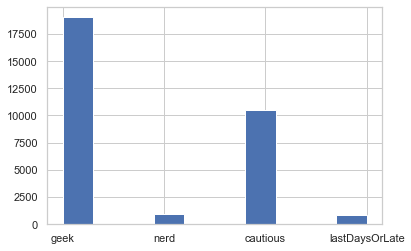

In [40]:
# binning proccess for registration date

# those are the min and max values
print("min: ",studentRegistration["date_registration"].min(),"max: ",studentRegistration["date_registration"].max())

# the intervals
bins = [-322,-172,-40,-10,167]

# the Labels
labels = ["nerd","geek","cautious","lastDaysOrLate"]

# new column and its graph
studentRegistration["student_typeRegistration"]=pd.cut(studentRegistration["date_registration"],bins=bins,labels=labels,include_lowest=True)
plt.hist(studentRegistration["student_typeRegistration"])

# result shows that I have an army.

min:  -317.0 max:  444.0


(array([3371.,    0., 1460.,    0.,    0., 1483.,    0., 3005.,    0.,
         479.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

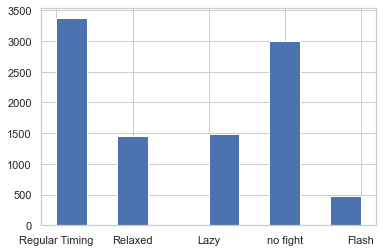

In [41]:
# binning proccess for UN-registration date

# those are the min and max values
print("min: ",studentRegistration["date_unregistration"].min(),
      "max: ",studentRegistration["date_unregistration"].max())

# new column and its graph
studentRegistration["student_typeUnRegistration"]=pd.cut(studentRegistration["date_unregistration"],
                                                         bins=[-317,0,10,90,150,444],
                                                         labels=["no fight","Flash","Regular Timing",
                                                                 "Relaxed","Lazy"],
                                                         include_lowest=True)
plt.hist(studentRegistration["student_typeUnRegistration"].dropna())

In [42]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,student_typeRegistration,student_typeUnRegistration
0,AAA,2013J,11391,-159.0,NaN,Pass,geek,NaN
1,AAA,2013J,28400,-53.0,NaN,Pass,geek,NaN
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,geek,Regular Timing
3,AAA,2013J,31604,-52.0,NaN,Pass,geek,NaN
4,AAA,2013J,32885,-176.0,NaN,Pass,nerd,NaN
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,Fail,lastDaysOrLate,NaN
32589,GGG,2014J,2645731,-23.0,NaN,Distinction,cautious,NaN
32590,GGG,2014J,2648187,-129.0,NaN,Pass,geek,NaN
32591,GGG,2014J,2679821,-49.0,101.0,Withdrawn,geek,Relaxed


In [43]:
typeVsFinal=pd.crosstab(studentRegistration["student_typeRegistration"],studentRegistration["final_result"])
typeVsFinal

final_result,Distinction,Fail,Pass,Withdrawn
student_typeRegistration,,,,
nerd,75,134,291,458
geek,1672,3904,7086,6379
cautious,1010,2594,4104,2779
lastDaysOrLate,68,261,348,182


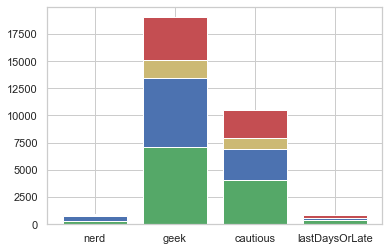

In [44]:
plt.bar(typeVsFinal.index, typeVsFinal["Pass"], color='g')
plt.bar(typeVsFinal.index, typeVsFinal["Withdrawn"], bottom=typeVsFinal["Pass"], color='b')
plt.bar(typeVsFinal.index, typeVsFinal["Distinction"], bottom=typeVsFinal["Pass"]+typeVsFinal["Withdrawn"], color='y')
plt.bar(typeVsFinal.index, typeVsFinal["Fail"], bottom=typeVsFinal["Pass"]+typeVsFinal["Withdrawn"]+typeVsFinal["Distinction"], color='r')
plt.show()

student_typeRegistration
nerd              2.171642
geek              1.815061
cautious          1.582113
lastDaysOrLate    1.333333
dtype: float64


<BarContainer object of 4 artists>

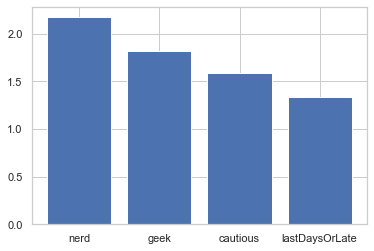

In [45]:
div_typeVsFinal=typeVsFinal["Pass"]/(typeVsFinal.loc[:,["Fail"]].sum(axis=1))
print(div_typeVsFinal)
plt.bar(div_typeVsFinal.index,div_typeVsFinal.values)
# pass/fail ratio gives the  basic idea of the earlier you register the more possible you pass

In [46]:
# I will try it with more equally divided bins

moreBins=np.linspace(studentRegistration["date_registration"].min(),studentRegistration["date_registration"].max(),101)
moreLabels=list(range(1,101))
studentRegistration["moreBinnedRegister"] = pd.cut(studentRegistration["date_registration"], bins=moreBins, labels=moreLabels, include_lowest=True)

hundred=pd.crosstab(studentRegistration["moreBinnedRegister"],studentRegistration["final_result"])
hundred.head(10)

final_result,Distinction,Fail,Pass,Withdrawn
moreBinnedRegister,,,,
1,0,0,0,4
3,0,0,1,6
4,1,0,4,7
5,0,0,1,3
6,0,0,2,4
7,1,1,0,3
8,0,0,2,4
9,0,0,3,3
10,0,0,0,6


moreBinnedRegister
1      NaN
3      inf
4      inf
5      inf
6      inf
      ... 
83     0.0
87     inf
89     0.0
92     0.0
100    NaN
Length: 82, dtype: float64


<BarContainer object of 82 artists>

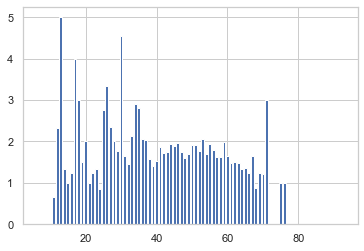

In [47]:
# lets check p/f on graph
div_hundred=hundred["Pass"]/(hundred.loc[:,["Fail"]].sum(axis=1))
print(div_hundred)
plt.bar(div_hundred.index,div_hundred.values)

# It means more than 70 days latenct for registeration guarantee that you gonna fail.
# also, more than 175 days of early registration increases your chance to pass.
# However, it is not a trustable enough prediction.

In [48]:
moodle.isnull().sum()
# too much missing value in week stuff. gonna drop them all

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [49]:
moodle.dropna(axis=1,inplace=True)
moodle

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


In [50]:
# top 5 most popular activities
topFive=moodle["activity_type"].value_counts().head(5).index.tolist()
print(topFive)

['resource', 'subpage', 'oucontent', 'url', 'forumng']


In [51]:
table = moodle[moodle['activity_type'].isin(topFive)]
table=table.groupby(['code_module', 'code_presentation']).activity_type.value_counts(ascending=False).to_frame()
table.rename(columns={"activity_type":"sum_perAct"},inplace=True)

table


sum_perAct
code_module code_presentation activity_type            
AAA         2013J             resource               95
                              oucontent              68
                              url                    18
                              forumng                15
                              subpage                 6
...                                                 ...
GGG         2014B             forumng                 2
            2014J             resource               63
                              oucontent              26
                              subpage                 5
                              forumng                 2

[107 rows x 1 columns]

In [52]:
# 1.5. Student Activity Data

In [53]:
# pivoting the data
clicks=pd.pivot_table(studentMoodleInteract,
                      index=["code_module","code_presentation"],values=["sum_click"],aggfunc=np.sum)
clicks

sum_click
code_module code_presentation           
AAA         2013J                 648494
            2014J                 598158
BBB         2013B                1347911
            2013J                1378656
            2014B                 833865
            2014J                1673744
CCC         2014B                1889177
            2014J                2792972
DDD         2013B                1387467
            2013J                1757214
            2014B                 947657
            2014J                1437751
EEE         2013J                1535953
            2014B                 832038
            2014J                1616236
FFF         2013B                4220055
            2013J                5116439
            2014B                2975619
            2014J                5281809
GGG         2013J                 509091
            2014B                 425165
            2014J                 399628

<AxesSubplot:xlabel='code_module', ylabel='sum_click'>

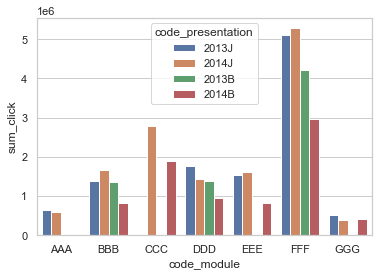

In [54]:
# visualizing

clicks.reset_index(inplace=True)
sns.barplot(x="code_module",y="sum_click",hue="code_presentation",data=clicks)

In [55]:
# 2013 clicks avg

clicks_first=clicks[clicks["code_presentation"].str.contains("2013")==True]
clicks_first=pd.crosstab(clicks_first["code_module"],clicks["code_presentation"],
            values=clicks_first["sum_click"],aggfunc=np.mean).mean(axis=1)
clicks_first

code_module
AAA     648494.0
BBB    1363283.5
DDD    1572340.5
EEE    1535953.0
FFF    4668247.0
GGG     509091.0
dtype: float64

In [56]:
# 2014 clicks avg

clicks_second=clicks[clicks["code_presentation"].str.contains("2014")==True]
clicks_second=pd.crosstab(clicks_second["code_module"],clicks["code_presentation"],
            values=clicks_second["sum_click"],aggfunc=np.mean).mean(axis=1)
clicks_second

code_module
AAA     598158.0
BBB    1253804.5
CCC    2341074.5
DDD    1192704.0
EEE    1224137.0
FFF    4128714.0
GGG     412396.5
dtype: float64

In [57]:
clicks_second-clicks_first

# number of clicks in 2014 for each course are not higher than 2013 clicks number.

code_module
AAA    -50336.0
BBB   -109479.0
CCC         NaN
DDD   -379636.5
EEE   -311816.0
FFF   -539533.0
GGG    -96694.5
dtype: float64

<BarContainer object of 6 artists>


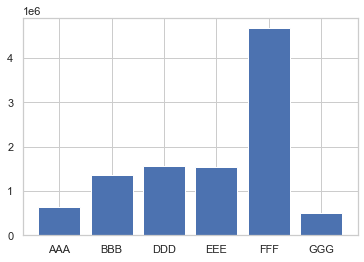

In [58]:
print(plt.bar(clicks_first.index,clicks_first.values))


<BarContainer object of 7 artists>


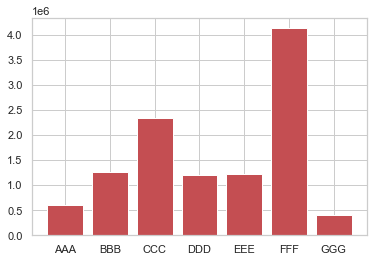

In [59]:
print(plt.bar(clicks_second.index,clicks_second.values,color="r"))

# It seems FFF has the highest click rates for both years.
# Also, all of them has almost the same ratio.
# more, CCC is the second one but it is not available in 2013
# more more, first semester, there could be a lower motivation
#  because, patterns look the same but values are lower in first graph.

In [60]:
# merging variables table and clicks
table.reset_index(inplace=True)
tableClicks=pd.merge(table, clicks, on = ["code_module","code_presentation"] )
tableClicks

,code_module,code_presentation,activity_type,sum_perAct,sum_click
0,AAA,2013J,resource,95,648494
1,AAA,2013J,oucontent,68,648494
2,AAA,2013J,url,18,648494
3,AAA,2013J,forumng,15,648494
4,AAA,2013J,subpage,6,648494
...,...,...,...,...,...
102,GGG,2014B,forumng,2,425165
103,GGG,2014J,resource,63,399628
104,GGG,2014J,oucontent,26,399628
105,GGG,2014J,subpage,5,399628


In [61]:
# pivoting again to make more understandable

pd.pivot_table(tableClicks,
               index=["code_module","code_presentation","sum_click","activity_type"],
                           values="sum_perAct",aggfunc=np.sum)


sum_perAct
code_module code_presentation sum_click activity_type            
AAA         2013J             648494    forumng                15
                                        oucontent              68
                                        resource               95
                                        subpage                 6
                                        url                    18
...                                                           ...
GGG         2014B             425165    subpage                 5
            2014J             399628    forumng                 2
                                        oucontent              26
                                        resource               63
                                        subpage                 5

[107 rows x 1 columns]

<AxesSubplot:xlabel='code_module', ylabel='sum_perAct'>

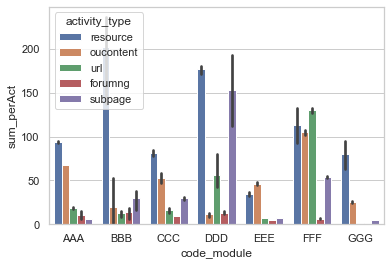

In [62]:
sns.barplot(x="code_module",y="sum_perAct",hue="activity_type",data=tableClicks)

In [63]:
# 2. Predictive Modeling

In [64]:
# 2.1. Generate Features from Demographic Information

In [65]:
studentInfo["final_bool"]=studentInfo["final_result"]
studentInfo["final_bool"]=studentInfo["final_bool"].replace(["Pass"],1)
studentInfo["final_bool"]=studentInfo["final_bool"].replace(["Withdrawn"],0)
studentInfo["final_bool"]=studentInfo["final_bool"].replace(["Fail"],0)
studentInfo["final_bool"]=studentInfo["final_bool"].replace(["Distinction"],0)
studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_bool
0,AAA,2013J,11391,M,East Anglian Region,HE or more,good,35<=,0,240,N,Pass,1
1,AAA,2013J,28400,F,Scotland,HE or more,bad,35<=,0,60,N,Pass,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,avg,35<=,0,60,Y,Withdrawn,0


In [66]:
studentInfo["code_modPre"]=studentInfo["code_module"]+studentInfo["code_presentation"]
studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_bool,code_modPre
0,AAA,2013J,11391,M,East Anglian Region,HE or more,good,35<=,0,240,N,Pass,1,AAA2013J
1,AAA,2013J,28400,F,Scotland,HE or more,bad,35<=,0,60,N,Pass,1,AAA2013J
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,avg,35<=,0,60,Y,Withdrawn,0,AAA2013J


In [67]:
studentInfo["num_of_prev_attempts"]=studentInfo["num_of_prev_attempts"].replace(dict.fromkeys([1,2,3,4,5,6], "1 or more"))
studentInfo["num_of_prev_attempts"].value_counts()
# still not even close to 0

0            27431
1 or more     4051
Name: num_of_prev_attempts, dtype: int64

In [68]:
min_credit=studentInfo["studied_credits"].min()
max_credit=studentInfo["studied_credits"].max()
studentInfo["creditLevel"] = pd.cut(studentInfo["studied_credits"], bins=np.linspace(min_credit,max_credit,6), labels=["very low","low","medium","high","very high"], include_lowest=True)
studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_bool,code_modPre,creditLevel
0,AAA,2013J,11391,M,East Anglian Region,HE or more,good,35<=,0,240,N,Pass,1,AAA2013J,low
1,AAA,2013J,28400,F,Scotland,HE or more,bad,35<=,0,60,N,Pass,1,AAA2013J,very low
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,avg,35<=,0,60,Y,Withdrawn,0,AAA2013J,very low


In [69]:
u=pd.crosstab(studentInfo["region"],studentInfo["final_bool"])
u=u.reset_index()
u["ratio"]=u[1]/u[0]
u
# I will combine them by bigger areas.

final_bool,region,0,1,ratio
0,East Anglian Region,2031,1309,0.644510
1,East Midlands Region,1484,881,0.593666
2,Ireland,506,412,0.814229
3,London Region,2117,1099,0.519131
4,North Region,738,354,0.479675
5,North Western Region,1948,953,0.489220
6,Scotland,2077,1357,0.653346
7,South East Region,1268,843,0.664826
8,South Region,1785,1259,0.705322
9,South West Region,1484,947,0.638140


In [70]:
studentInfo["region"]=studentInfo["region"].replace(["East Anglian Region","London Region","East Midlands Region"],"East")
studentInfo["region"]=studentInfo["region"].replace(["North Region","North Western Region"],"North")
studentInfo["region"]=studentInfo["region"].replace(["Scotland","South East Region","South Region","South West Region"],"South")
studentInfo["region"]=studentInfo["region"].replace(["Wales","West Midlands Region","Yorkshire Region"],"West")

In [71]:
# joining important data fram another df
studentInfo=studentInfo.join(studentRegistration["student_typeRegistration"])

In [72]:
# according to pass/fail ratio, classes will divided by difficulty.
p=pd.crosstab(studentInfo["code_module"],studentInfo["final_result"]).reset_index()
p["Pass"]/p.loc[:,["Distinction","Fail","Withdrawn"]].sum(axis=1)

0    1.854331
1    0.634583
2    0.357143
3    0.533658
4    0.776166
5    0.603078
6    0.789660
dtype: float64

In [73]:
# appearently AAA, EEE and GGG are easy ones.
# CCC and DDD are hard
# BBB and FFF are normal

studentInfo["difficulty"]=studentInfo["code_module"].replace(["AAA","EEE","GGG"],"Easy")
studentInfo["difficulty"]=studentInfo["code_module"].replace(["CCC","DDD"],"Hard")
studentInfo["difficulty"]=studentInfo["code_module"].replace(["BBB","FFF"],"Normal")

In [74]:
model=pd.get_dummies(studentInfo.loc[:,
                               ["gender","region","highest_education","imd_band",
                                "age_band","difficulty","num_of_prev_attempts","disability",
                                "code_presentation","creditLevel","final_bool","student_typeRegistration"]])
model

,final_bool,gender_F,gender_M,region_East,region_Ireland,region_North,region_South,region_West,highest_education_A Level or Equivalent,highest_education_HE or more,...,code_presentation_2014J,creditLevel_very low,creditLevel_low,creditLevel_medium,creditLevel_high,creditLevel_very high,student_typeRegistration_nerd,student_typeRegistration_geek,student_typeRegistration_cautious,student_typeRegistration_lastDaysOrLate
0,1,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
32589,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
32590,1,1,0,0,0,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
32591,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [75]:
# 2.2. Generate/Select Features from Click Data

In [76]:
id_clicks=pd.crosstab(studentMoodleInteract["id_student"],studentMoodleInteract["sum_click"]).sum(axis=1)
id_clicks=id_clicks.reset_index()
id_clicks=id_clicks.rename(columns={0:"clicks"})

In [77]:
studentInfo=studentInfo.merge(id_clicks,on="id_student",how="left")
studentInfo.dropna(inplace=True)

In [78]:
studentInfo["clicks"]= pd.cut(studentInfo["clicks"],
                              bins=[0,330,2500,6977],
                              labels=["almost non","clicker","mause nemesis"],
                              include_lowest=True)

studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_bool,code_modPre,creditLevel,student_typeRegistration,difficulty,clicks
0,AAA,2013J,11391,M,East,HE or more,good,35<=,0,240,N,Pass,1,AAA2013J,low,geek,AAA,almost non
1,AAA,2013J,28400,F,South,HE or more,bad,35<=,0,60,N,Pass,1,AAA2013J,very low,geek,AAA,clicker
2,AAA,2013J,30268,F,North,A Level or Equivalent,avg,35<=,0,60,Y,Withdrawn,0,AAA2013J,very low,geek,AAA,almost non


In [79]:
studentInfo["clicks"].value_counts()

almost non       15827
clicker          12642
mause nemesis      121
Name: clicks, dtype: int64

In [80]:
model=pd.get_dummies(studentInfo.loc[:,
                               ["clicks","gender","region","highest_education","imd_band",
                                "age_band","difficulty","num_of_prev_attempts","disability",
                                "code_presentation","creditLevel","final_bool","student_typeRegistration"]])
model

,final_bool,clicks_almost non,clicks_clicker,clicks_mause nemesis,gender_F,gender_M,region_East,region_Ireland,region_North,region_South,...,code_presentation_2014J,creditLevel_very low,creditLevel_low,creditLevel_medium,creditLevel_high,creditLevel_very high,student_typeRegistration_nerd,student_typeRegistration_geek,student_typeRegistration_cautious,student_typeRegistration_lastDaysOrLate
0,1,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31477,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
31478,0,1,0,0,1,0,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
31479,1,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
31480,0,1,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [81]:
# 2.3. Training and Testing the Model

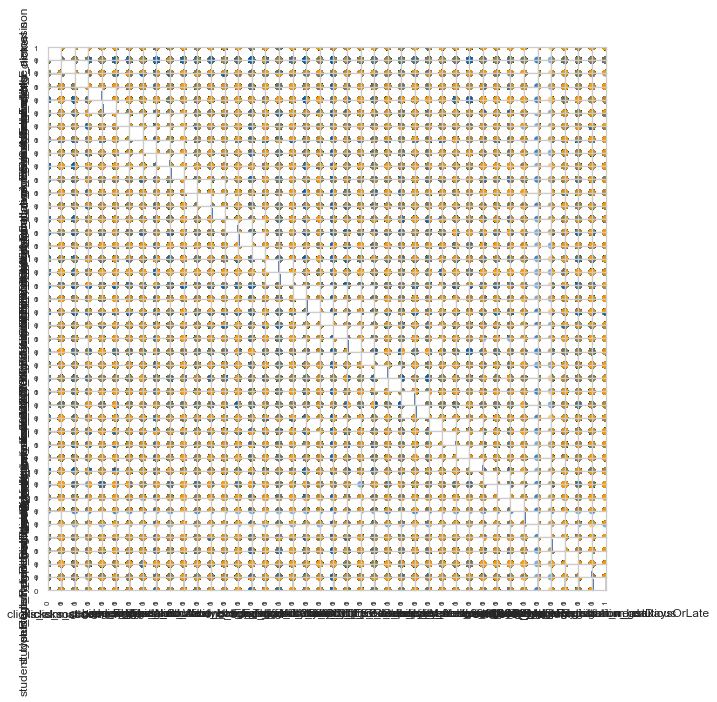

In [82]:
X=model.drop(["final_bool"],axis=1)
y=model["final_bool"]

color_wheel={1:"#0059b3",0:"#ff9900"}
colors=y.map(lambda x: color_wheel.get(x))

scatter=pd.plotting.scatter_matrix(X, color=colors,marker="o",figsize=(10,10))
plt.show()

In [83]:
knn_classifier=sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X,y)
knn_classifier.score(X,y)

0.7300804477089892

In [84]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,random_state=0,test_size=0.33)
print(len(X_train),len(X_test))

classifier=LogisticRegression(penalty="l1",solver="liblinear",tol=0.05,random_state=0)
classifier.fit(X_train,y_train)

predicted=classifier.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, predicted))

19155 9435
0.6739798622151564


In [85]:
print("LOGISTIC","-"*100)
print("Classification report for classifier %s:\n%s\n"
 % (classifier, sklearn.metrics.classification_report(y_test,predicted)))
print("Confussion matrix:\n%s" % sklearn.metrics.confusion_matrix(y_test, predicted))

LOGISTIC ----------------------------------------------------------------------------------------------------
Classification report for classifier LogisticRegression(penalty='l1', random_state=0, solver='liblinear', tol=0.05):
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      5553
           1       0.62      0.55      0.58      3882

    accuracy                           0.67      9435
   macro avg       0.66      0.66      0.66      9435
weighted avg       0.67      0.67      0.67      9435


Confussion matrix:
[[4227 1326]
 [1750 2132]]


In [87]:
probas_=classifier.predict_proba(X_test)
probas_[0:10]

array([[0.84456829, 0.15543171],
       [0.84375749, 0.15624251],
       [0.40609995, 0.59390005],
       [0.45053983, 0.54946017],
       [0.34309693, 0.65690307],
       [0.29733835, 0.70266165],
       [0.70186904, 0.29813096],
       [0.7844042 , 0.2155958 ],
       [0.62138873, 0.37861127],
       [0.93799301, 0.06200699]])

In [88]:
X_test.head(3)

,clicks_almost non,clicks_clicker,clicks_mause nemesis,gender_F,gender_M,region_East,region_Ireland,region_North,region_South,region_West,...,code_presentation_2014J,creditLevel_very low,creditLevel_low,creditLevel_medium,creditLevel_high,creditLevel_very high,student_typeRegistration_nerd,student_typeRegistration_geek,student_typeRegistration_cautious,student_typeRegistration_lastDaysOrLate
6088,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
22128,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
21810,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [90]:
feature_scores_132=X_test.iloc[132,:].tolist()
feature_scores_132

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [91]:
from scipy.stats import logistic
logistic.cdf(np.dot(feature_scores_132,classifier.coef_[0])+classifier.intercept_)

array([0.40296974])